## 패키지 불러오기

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

## 파일 로드 및 확인

In [ ]:
# 파일 경로
file_path = '/content/cmm_data.csv'

# 데이터 불러오기
data = pd.read_csv(file_path, encoding='cp949')

In [ ]:
# 결측치 및 데이터 타입 확인
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values, data_types

(파일명                                    0
 평면1,평면도                                0
 원1(I) <상>,D                            0
 원2(I) <중>,D                            0
 원3(I) <하>,D                            0
                                       ..
 점30 <- 점18의 되부름 <소재원점>,Y               0
 직선25 <- 직선18의 되부름,X/Y                  0
 직선26 <- 직선16의 되부름,X/Y                  0
 거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS    0
 품질상태                                   0
 Length: 67, dtype: int64,
 파일명                                     object
 평면1,평면도                                float64
 원1(I) <상>,D                            float64
 원2(I) <중>,D                            float64
 원3(I) <하>,D                            float64
                                         ...   
 점30 <- 점18의 되부름 <소재원점>,Y               float64
 직선25 <- 직선18의 되부름,X/Y                  float64
 직선26 <- 직선16의 되부름,X/Y                  float64
 거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS    float64
 품질상태                          

In [ ]:
# '파일명' 열 제외
data_numeric = data.drop(columns=['파일명'])

# 결측치를 평균값으로 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

# 데이터프레임으로 변환
data_imputed = pd.DataFrame(data_imputed, columns=data_numeric.columns)

In [ ]:
# 독립 변수와 종속 변수 분리
X = data_imputed.drop(columns=['품질상태'])
y = data_imputed['품질상태']

In [ ]:
data_imputed

,"평면1,평면도","원1(I) <상>,D","원2(I) <중>,D","원3(I) <하>,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,원통도","원통1(I) <- 원1, 원2, 원3의 측정점 병합,직각도","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,X","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,Y","각도1 <- 각도[XYPLAN]:직선2와 직선3,Ang",...,"점28 <- 점27의 되부름 <소재 원점>,Y","각도2 <- 각도[XYPLAN]:직선23와 직선24,Ang","점29 <- 점13의 되부름 <소재원점>,X","점29 <- 점13의 되부름 <소재원점>,Y","점30 <- 점18의 되부름 <소재원점>,X","점30 <- 점18의 되부름 <소재원점>,Y","직선25 <- 직선18의 되부름,X/Y","직선26 <- 직선16의 되부름,X/Y","거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS",품질상태
0,0.0260,0.0260,0.0260,0.0260,0.0260,0.0260,0.0260,0.0260,0.0260,0.0260,...,0.0260,0.0260,0.0260,0.0260,0.0260,0.0260,0.0260,0.0260,0.0260,1.0
1,0.0375,0.0375,0.0375,0.0375,0.0375,0.0375,0.0375,0.0375,0.0375,0.0375,...,0.0375,0.0375,0.0375,0.0375,0.0375,0.0375,0.0375,0.0375,0.0375,1.0
2,0.0280,0.0280,0.0280,0.0280,0.0280,0.0280,0.0280,0.0280,0.0280,0.0280,...,0.0280,0.0280,0.0280,0.0280,0.0280,0.0280,0.0280,0.0280,0.0280,1.0
3,0.0215,0.0215,0.0215,0.0215,0.0215,0.0215,0.0215,0.0215,0.0215,0.0215,...,0.0215,0.0215,0.0215,0.0215,0.0215,0.0215,0.0215,0.0215,0.0215,0.0
4,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,...,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0.0250,0.0250,0.0250,0.0250,0.0250,0.0250,0.0250,0.0250,0.0250,0.0250,...,0.0250,0.0250,0.0250,0.0250,0.0250,0.0250,0.0250,0.0250,0.0250,1.0
698,0.0170,0.0170,0.0170,0.0170,0.0170,0.0170,0.0170,0.0170,0.0170,0.0170,...,0.0170,0.0170,0.0170,0.0170,0.0170,0.0170,0.0170,0.0170,0.0170,1.0
699,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,...,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,1.0
700,0.0145,0.0145,0.0145,0.0145,0.0145,0.0145,0.0145,0.0145,0.0145,0.0145,...,0.0145,0.0145,0.0145,0.0145,0.0145,0.0145,0.0145,0.0145,0.0145,0.0


## 여러 모델 학습(Clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 수: 2, Inertia: 14286.162687182445, Silhouette Score: 0.8425121496802458


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 수: 3, Inertia: 6748.927542013705, Silhouette Score: 0.717771149240789


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 수: 4, Inertia: 3906.175301218452, Silhouette Score: 0.6032528403869403
클러스터 수: 5, Inertia: 2587.015448814379, Silhouette Score: 0.5448630237037034


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 수: 6, Inertia: 1760.921349141053, Silhouette Score: 0.538385690089408


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 수: 7, Inertia: 1254.6110971786577, Silhouette Score: 0.5314479687780981


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 수: 8, Inertia: 894.1734256522955, Silhouette Score: 0.5340361437099848


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 수: 9, Inertia: 715.8764788948718, Silhouette Score: 0.5100312668068615


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 수: 10, Inertia: 564.6899262765911, Silhouette Score: 0.5149457518316561


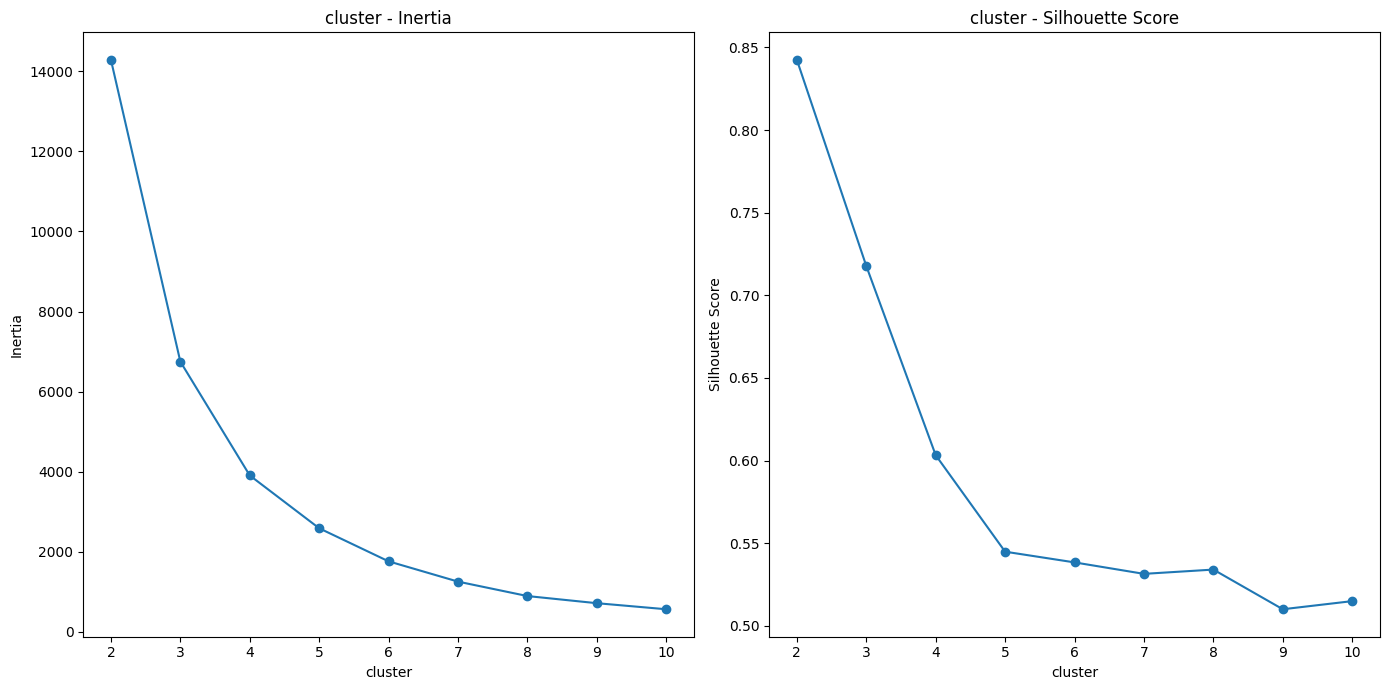

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# StandardScaler를 사용하여 표준화된 특성을 데이터프레임으로 변환
X_train_scaled_df = pd.DataFrame(X_train, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test, columns=X.columns)

# 저장
X_train_scaled_df.to_csv('X_train_scaled.csv', index=False)
X_test_scaled_df.to_csv('X_test_scaled.csv', index=False)

# 클러스터 수 범위 설정
cluster_range = range(2, 11)
inertia_values = []
silhouette_scores = []


# 다양한 클러스터 수에 대해 KMeans 모델 훈련 및 평가
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train)
    cluster_labels = kmeans.labels_

    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(X_train, cluster_labels)

    inertia_values.append(inertia)
    silhouette_scores.append(silhouette_avg)

    print(f"클러스터 수: {n_clusters}, Inertia: {inertia}, Silhouette Score: {silhouette_avg}")

# Inertia 및 Silhouette Score 시각화
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('cluster')
plt.ylabel('Inertia')
plt.title('cluster - Inertia')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('cluster')
plt.ylabel('Silhouette Score')
plt.title('cluster - Silhouette Score')

plt.tight_layout()
plt.show()

###평가지표

최적의 클러스터 수: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

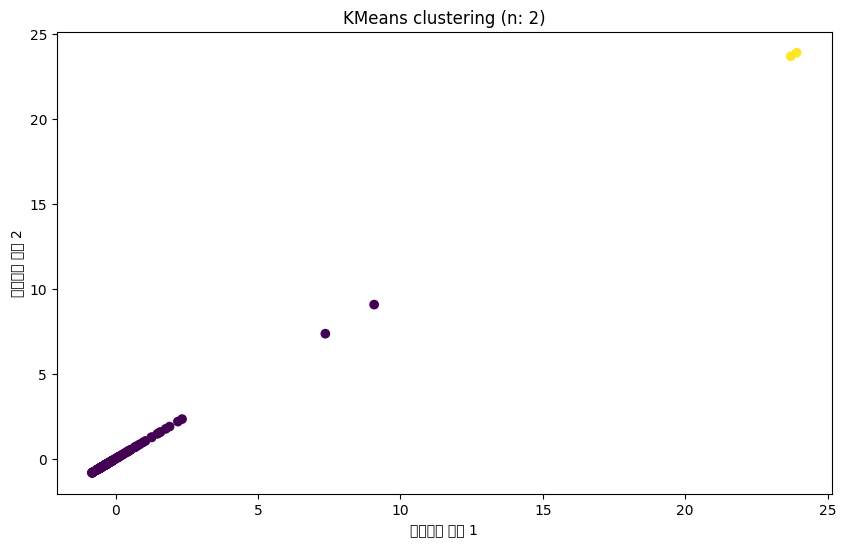

In [ ]:
# silbouette 를 사용하여 최적의 클러스터 수 선택 (다른 클러스터와 비교하여 응집성와 얼마나 유사한지 실루엣 점수로 높을수록 클러스터링 잘됨)
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"최적의 클러스터 수: {optimal_clusters}")
# 최적의 클러스터 수로 KMeans 모델 훈련
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_test)
# 클러스터 할당
cluster_labels = kmeans_optimal.labels_

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title(f'KMeans clustering (n: {optimal_clusters})')
plt.xlabel('표준화된 특성 1')
plt.ylabel('표준화된 특성 2')
plt.show()


num_dots = len(X_test[:, 0])
print(f'Number of Dots: {num_dots}')


### 평가지표

최적의 클러스터 수: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io

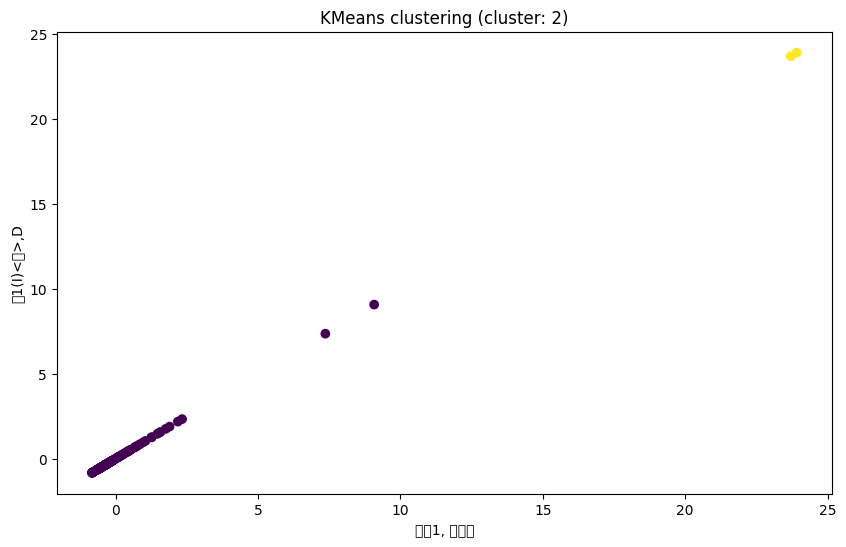

Number of Dots: 141


In [ ]:
# Elbow method를 사용하여 최적의 클러스터 수 선택 (관성값의 차이를 계산하여 감소율이 급격하게 변하는 지점)
optimal_clusters = cluster_range[np.argmin(np.diff(inertia_values))]
print(f"최적의 클러스터 수: {optimal_clusters}")
# 최적의 클러스터 수로 KMeans 모델 훈련
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_test)
# 클러스터 할당
cluster_labels = kmeans_optimal.labels_

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title(f'KMeans clustering (cluster: {optimal_clusters})')
plt.xlabel('평면1, 평면도')
plt.ylabel('원1(I)<상>,D')
plt.show()

num_dots = len(X_test[:, 0])
print(f'Number of Dots: {num_dots}')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

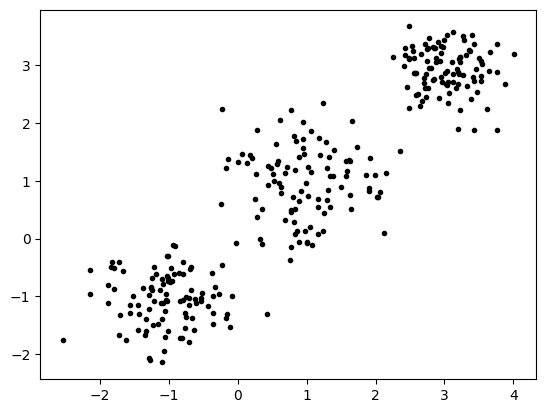

In [ ]:
np.random.seed(7)

x1 = np.random.standard_normal((100,2))*0.6+np.ones((100,2))
x2 = np.random.standard_normal((100,2))*0.5-np.ones((100,2))
x3 = np.random.standard_normal((100,2))*0.4-2*np.ones((100,2))+5
X = np.concatenate((x1,x2,x3),axis=0)

plt.plot(X[:,0],X[:,1],'k.')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
n = 3
k_means = KMeans(n_clusters=n)
k_means.fit(X)
centroids = k_means.cluster_centers_
labels= k_means.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


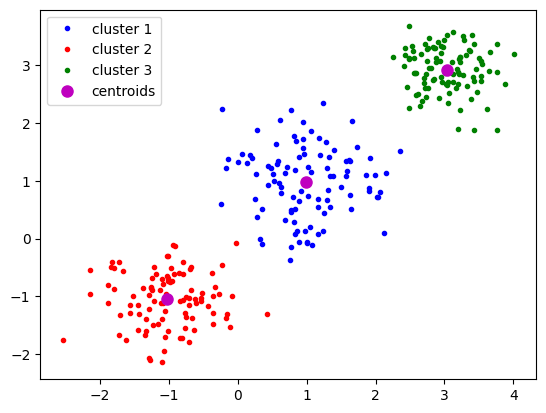

In [ ]:
plt.plot(X[labels==0,0],X[labels==0,1],'b.', label='cluster 1')
plt.plot(X[labels==1,0],X[labels==1,1],'r.', label='cluster 2')
plt.plot(X[labels==2,0],X[labels==2,1],'g.', label='cluster 3')

plt.plot(centroids[:,0],centroids[:,1],'mo',markersize=8, label='centroids')

plt.legend(loc='best')
plt.show()